In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
path='./data/'
df=pd.read_csv(path+'Health_AnimalBites.csv')
# Tête de données 
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [2]:
df_plus=pd.read_csv(path+'age_adopte.csv')
# Tête des faux données
df_plus.head()

,age,adopted
0,2,Yes
1,15,Yes
2,5,Yes
3,14,Yes
4,5,No


In [3]:
frames = [df, df_plus]
result = pd.concat(frames, axis=1, join="inner")
# Info des données
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8989 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7164 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
 15  age                8990 non-null   int64  
 16  adopted            8990 

In [4]:
rows,columns = result.shape
print(f"Le dataset a {rows} lignes et {columns} colonnes")

Le dataset a 8990 lignes et 17 colonnes


In [5]:
# Tête des données completes
result.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,age,adopted
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2,Yes
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,15,Yes
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,5,Yes
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,14,Yes
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,5,No


In [6]:
# Les colonnes des données
result.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc', 'age', 'adopted'],
      dtype='object')

In [7]:
#Stats descriptives du dataset
result.describe()

,vaccination_yrs,age
count,3738.000000,8990.000000
mean,1.452113,9.759956
std,0.848416,6.199972
min,1.000000,0.000000
25%,1.000000,5.000000
50%,1.000000,10.000000
75%,1.000000,15.000000
max,11.000000,21.000000


In [8]:
# Comme n'importe quel dataset, il vient pas propre. Il faut retirer nan values pour voir que les espèces correctes.
species = result.SpeciesIDDesc
species = species.dropna()
speciesOfAnimal = species.unique()
# Dans cet dataset, nous avons 9 espèces d'animaux.
# ['Chien' 'Chat' 'Chauve-souris' 'Raton laveur' 'Autre' 'Lapin' 'Cheval' 'Moufette' 'Furet']
print(speciesOfAnimal)

['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']


In [9]:
# List des animaux en français
speciesOfAnimal_label_fr = ['Chien', 'Chat', 'Chauve_souris', 'Raton_laveur', 'Autre', 'Lapin', 'Cheval', 'Moufette', 'Furet']
print(speciesOfAnimal_label_fr)

['Chien', 'Chat', 'Chauve_souris', 'Raton_laveur', 'Autre', 'Lapin', 'Cheval', 'Moufette', 'Furet']


[7029, 1568, 237, 27, 11, 3, 5, 1, 4]


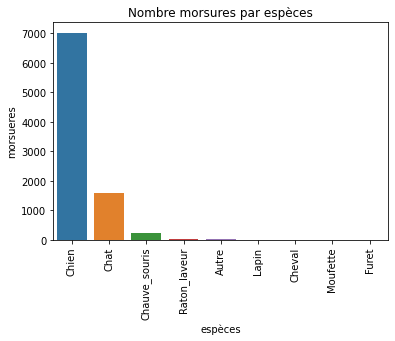

In [10]:
# Nombre de moursures des animaux par espèces animal

animal_list = []
for specie in speciesOfAnimal:
    animal_list.append(len(species[species==specie]))
ax = sns.barplot(x=speciesOfAnimal, y =animal_list)
ax.set(xlabel='espèces', ylabel='morsueres')
plt.title("Nombre morsures par espèces")
# Ici on utilises les labels en français
ax.set_xticklabels(speciesOfAnimal_label_fr, rotation='vertical', fontsize=10)
plt.xticks(rotation=90)
print(animal_list)
# On peut dire que les chiens et chat sont les animaux plus dangereux 

Index(['PIT BULL', 'GERM SHEPHERD', 'LABRADOR RETRIV', 'BOXER', 'CHICHAUHUA',
       'SHIH TZU', 'BEAGLE', 'ROTTWEILER', 'AAUST. TERR.', 'DACHSHUND'],
      dtype='object')


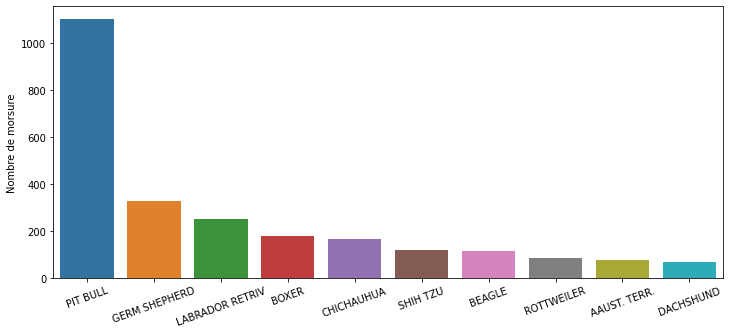

In [11]:
# Les 10 races de chiens plus agressives

count = result.BreedIDDesc.value_counts()
plt.figure(figsize=(12,5))
ax2 = sns.barplot(x=count[0:10].index,y=count[0:10])
ax2.set(xlabel='espèces', ylabel='morsueres')
plt.xticks(rotation=20)
plt.ylabel("Nombre de morsure")
print(count[0:10].index)

In [12]:

import datetime
# Passer la date de la morsure dans le formate datetime pour mieux travailler avec
result['bite_date'] = pd.to_datetime(result['bite_date'], errors = 'coerce')
result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8988 non-null   datetime64[ns]
 1   SpeciesIDDesc      8885 non-null   object        
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   object        
 7   victim_zip         7164 non-null   object        
 8   AdvIssuedYNDesc    2565 non-null   object        
 9   WhereBittenIDDesc  8387 non-null   object        
 10  quarantine_date    2020 non-null   object        
 11  DispositionIDDesc  1535 non-null   object        
 12  head_sent_date     395 non-null    object        
 13  release_date       1445 non-null   object        
 14  ResultsI

In [13]:
# Dataset seulement avec des chiens (la espèces plus dangeraux)
chiens = result[result['SpeciesIDDesc'] == 'DOG']
chiens

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,age,adopted
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2,Yes
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,15,Yes
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,5,Yes
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,14,Yes
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,2017-09-05,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,8,Yes
8986,2017-09-07,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN,6,No
8987,2017-09-07,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,21,No
8988,2017-09-07,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN,4,No


In [14]:
 
print(f"Sur le dataset a des données des chiens agées entre : {chiens['age'].min()} ans et {chiens['age'].max()} ans ce qui fait une moyenne d'âge: {chiens['age'].mean()} ans")

Sur le dataset a des données des chiens agées entre : 0 ans et 21 ans ce qui fait une moyenne d'âge: 9.765685019206146 ans


Text(0.5, 0, 'Date de morsure')

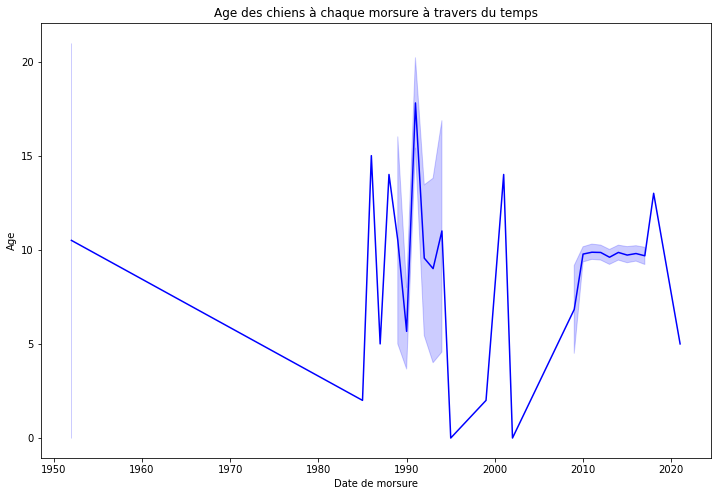

In [15]:

# Description:
# Reprpresentation graphique linesplot de l'âge des chiens à chaque morsure à travers du temps,
# du 1950 au 2020.
# Conclusion: 
# Les chiens sont plus susceptibles de mordre un humain entre 7 et 15 ans

plt.figure(figsize=(12,8))

bite_by_year = sns.lineplot(x=result['bite_date'].dt.year,y='age',data=chiens, color="#0000FF")
bite_by_year.set_title("Age des chiens à chaque morsure à travers du temps")
bite_by_year.set_ylabel("Age")
bite_by_year.set_xlabel("Date de morsure")

<AxesSubplot:xlabel='age', ylabel='bite_date'>

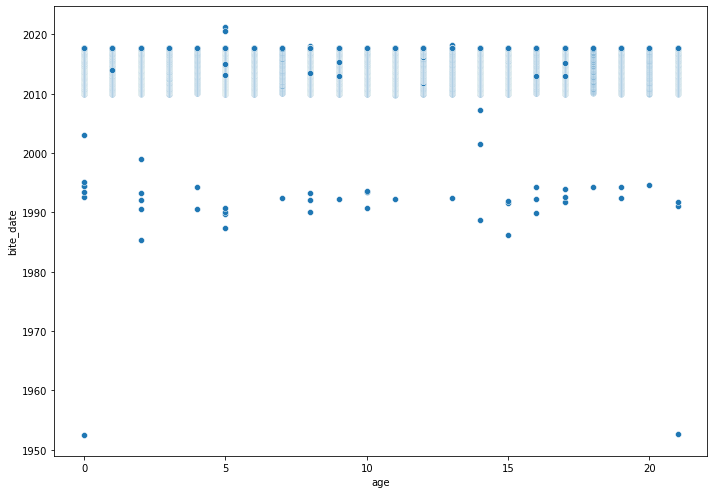

In [16]:
# Meme representation, mais avec un scatterplot
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data=result ,x="age",y="bite_date", ax=ax)

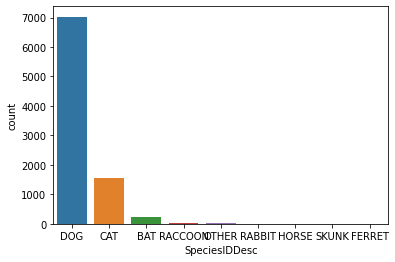

In [17]:
# Countplot pour contabiliser les morsures des animaux
sns.countplot(x="SpeciesIDDesc",data=result)
plt.show()

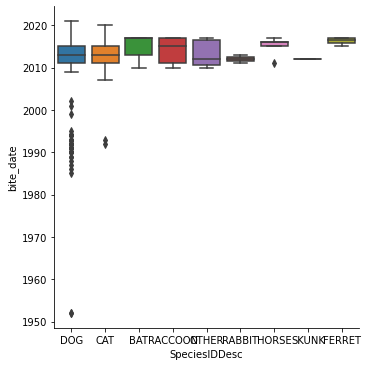

In [18]:
# Catplot pour visualiser encore la morsures des animaux en function du temps

filter_tab = sns.catplot(data=result, x='SpeciesIDDesc', y=result['bite_date'].dt.year, kind='box')

On voit que il y a plus de cas des morsure dans le corps: 4909, que dans la tete: 1184


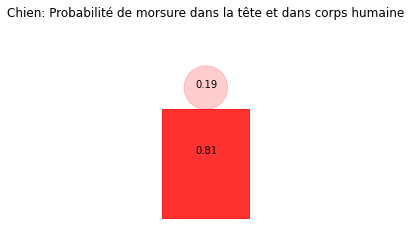

In [67]:
# Representation du 
import matplotlib.patches as patches
animal = 'DOG'
#bitePlaces = chiens.WhereBittenIDDesc.unique()
#print(bitePlaces)
head = chiens.loc[(chiens['SpeciesIDDesc']==animal)&(chiens['WhereBittenIDDesc']=='HEAD')]
body = chiens.loc[(chiens['SpeciesIDDesc']==animal)&(chiens['WhereBittenIDDesc']=='BODY')]
numberOfHead = len(head)
numberOfBody = len(body)
total = numberOfHead+numberOfBody
fig1=plt.figure()
ax1=fig1.add_subplot(111,aspect='equal')
ax1.add_patch(
    patches.Rectangle((0.3,0.1),0.4,0.5,alpha=numberOfBody/float(total),color='r')
)
circle = plt.Circle((0.5,0.7),0.1,color='r',alpha=numberOfHead/float(total))
ax1.add_artist(circle)
plt.text(0.45,0.7,round(numberOfHead/float(total),2))
plt.text(0.45,0.4,round(numberOfBody/float(total),2))
plt.title('Chien: Probabilité de morsure dans la tête et dans corps humaine')
plt.axis('off')
print(f"On voit que il y a plus de cas des morsure dans le corps: {numberOfBody}, que dans la tete: {numberOfHead}")

In [20]:
# Je trouve que les morsures de chiens et chats sont plus pertinent à analyser
# Je vais traiter ces deux espèces
cond1 = result['SpeciesIDDesc'] == 'DOG' 
cond2 = result['SpeciesIDDesc'] == 'CAT'
chiens_chat = result[cond1 | cond2]
chiens_chat

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,age,adopted
0,1985-05-05,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2,Yes
1,1986-02-12,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,15,Yes
2,1987-05-07,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,5,Yes
3,1988-10-02,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,14,Yes
4,1989-08-29,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,2017-09-05,DOG,NaN,NaN,NaN,NaN,NaN,40243,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,8,Yes
8986,2017-09-07,DOG,POMERANIAN,MALE,RED,NaN,NaN,40204,NaN,HEAD,NaN,NaN,NaN,NaN,NaN,6,No
8987,2017-09-07,DOG,LABRADOR RETRIV,MALE,BROWN,NaN,NaN,47130,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,21,No
8988,2017-09-07,DOG,LABRADOR RETRIV,FEMALE,BLK WHT,NaN,NaN,40229,NaN,BODY,NaN,NaN,NaN,NaN,NaN,4,No


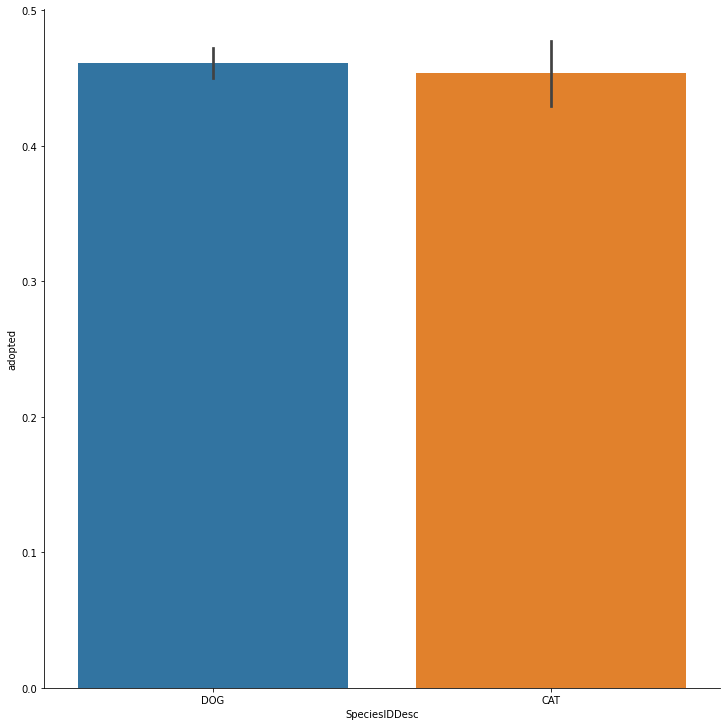

In [68]:
# Catplot sur les chiens et les chats
result_boolean = chiens_chat.replace('Yes', 1).replace('No',0)
sns.catplot(data=result_boolean, x='SpeciesIDDesc', y='adopted', kind='bar', height=10)



MALE      3829
FEMALE    2012
Name: GenderIDDesc, dtype: int64


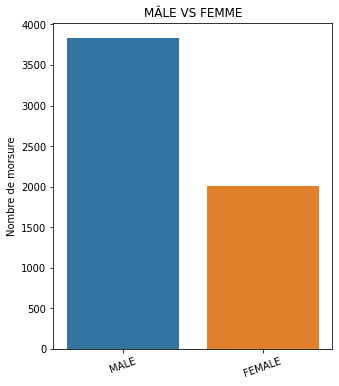

In [70]:
# Representation des morsures des animaux par genre
gender = ['MALE','FEMALE']
count_gender = chiens_chat.GenderIDDesc.value_counts()
plt.figure(figsize= (5,6))
x = sns.barplot(x=gender, y= count_gender[0:2])
plt.ylabel('Nombre de morsure')
plt.xticks(rotation = 20)
plt.title('MÂLE VS FEMME')
print(count_gender[0:2])

In [23]:
# Nombre des morsures par sexe et especes
cont = pd.crosstab(chiens_chat["SpeciesIDDesc"],chiens_chat["GenderIDDesc"])
cont
# On peut observer que il n'y a pas trop de difences entre la morsures de chats selon son sexe, mais c'est different chez les chiens. Les males sont plus dangeureaux que les females.

GenderIDDesc,FEMALE,MALE,UNKNOWN
SpeciesIDDesc,,,
CAT,411,522,144
DOG,1601,3307,464


In [24]:
# Test du chi carré d'indépendance des variables dans un tableau de contingence.
# Cette fonction calcule la statistique du chi carré et la valeur p pour le test d'hypothèse d'indépendance des fréquences observées dans le tableau de contingence observé [cellule 23]
import scipy
scipy.stats.chi2_contingency(cont)

(67.30807331042499,
 2.422353866890367e-15,
 2,
 array([[ 336.00930377,  639.4530935 ,  101.53760273],
        [1675.99069623, 3189.5469065 ,  506.46239727]]))

<bound method Axes.bar of <AxesSubplot:>>

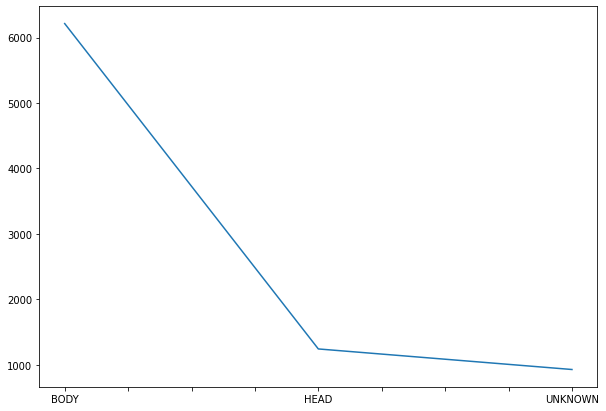

In [25]:
# Representaion pour savoir où ça passe la morsure chez les humaines.
location = result["WhereBittenIDDesc"]
#graphique à barres de la distribution des emplacements de morsure
plt.figure(figsize=(10 , 7))
result.WhereBittenIDDesc.value_counts().plot().bar

[1, 58]


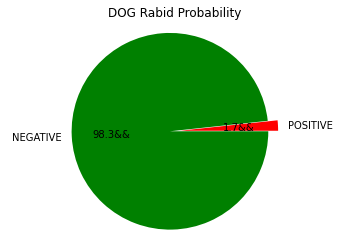

In [26]:
# La probabilité de rage du chien est de 1,7%
# Il y a un total de 1 record enragés.

labels = ['POSITIVE','NEGATIVE']
colors = ['red','green']
explode = [0.1,0]
p = result.loc[(result['SpeciesIDDesc']==animal)&(result['ResultsIDDesc']=='POSITIVE')]
n = result.loc[(result['SpeciesIDDesc']==animal)&(result['ResultsIDDesc']=='NEGATIVE')]
sizes = [len(p),len(n)]
print(sizes)
if len(p)==0:
    labels = ['','NEGATIVE']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct ='%1.1f&&')
plt.axis('equal')
plt.title(animal + ' Rabid Probability')
plt.show()


In [27]:
#À mon avis, cela n'est pas lié au résultat de l'analyse des données, les personnes qui ont un chien sont plus dangereuses que celles qui ont des chats.

In [28]:
# Encoder notre variable target
#species = result.SpeciesIDDesc
#species = species.dropna()
#speciesOfAnimal = species.unique()
#['DOG' 'CAT' 'BAT' 'RACCOON' 'OTHER' 'RABBIT' 'HORSE' 'SKUNK' 'FERRET']
result2 = result 
result2["SpeciesIDDesc"] = species
result2.loc[:,'SpeciesIDDesc'] = result2['SpeciesIDDesc'].map({'DOG':0,'CAT':1,'BAT':2,'RACCOON':3,'OTHER':4,'RABBIT':5,'HORSE':6,'SKUNK':7,'FERRET':8})
result2['SpeciesIDDesc'].unique()




array([ 0.,  1.,  2.,  3.,  4.,  5., nan,  6.,  7.,  8.])

In [29]:
#Analyse des valeures manquantes
result2.isna().sum()

bite_date               2
SpeciesIDDesc         105
BreedIDDesc          5231
GenderIDDesc         2513
color                2564
vaccination_yrs      5252
vaccination_date     4875
victim_zip           1826
AdvIssuedYNDesc      6425
WhereBittenIDDesc     603
quarantine_date      6970
DispositionIDDesc    7455
head_sent_date       8595
release_date         7545
ResultsIDDesc        7447
age                     0
adopted                 0
dtype: int64

In [30]:
result2.dtypes

bite_date            datetime64[ns]
SpeciesIDDesc               float64
BreedIDDesc                  object
GenderIDDesc                 object
color                        object
vaccination_yrs             float64
vaccination_date             object
victim_zip                   object
AdvIssuedYNDesc              object
WhereBittenIDDesc            object
quarantine_date              object
DispositionIDDesc            object
head_sent_date               object
release_date                 object
ResultsIDDesc                object
age                           int64
adopted                      object
dtype: object

In [31]:
#Supprimer les colonnes inutiles DATA CLEANING
df2 = result2.drop('victim_zip',axis=1)
df2.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc,age,adopted
0,1985-05-05,0.0,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,2,Yes
1,1986-02-12,0.0,NaN,UNKNOWN,BRO & BLA,NaN,NaN,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,15,Yes
2,1987-05-07,0.0,NaN,UNKNOWN,NaN,NaN,NaN,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,5,Yes
3,1988-10-02,0.0,NaN,MALE,BLA & BRO,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN,14,Yes
4,1989-08-29,0.0,NaN,FEMALE,BLK-WHT,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN,5,No


In [33]:
df2['SpeciesIDDesc'].value_counts(normalize=True)

0.0    0.791109
1.0    0.176477
2.0    0.026674
3.0    0.003039
4.0    0.001238
6.0    0.000563
8.0    0.000450
5.0    0.000338
7.0    0.000113
Name: SpeciesIDDesc, dtype: float64

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8990 entries, 0 to 8989
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bite_date          8988 non-null   datetime64[ns]
 1   SpeciesIDDesc      8885 non-null   float64       
 2   BreedIDDesc        3759 non-null   object        
 3   GenderIDDesc       6477 non-null   object        
 4   color              6426 non-null   object        
 5   vaccination_yrs    3738 non-null   float64       
 6   vaccination_date   4115 non-null   object        
 7   AdvIssuedYNDesc    2565 non-null   object        
 8   WhereBittenIDDesc  8387 non-null   object        
 9   quarantine_date    2020 non-null   object        
 10  DispositionIDDesc  1535 non-null   object        
 11  head_sent_date     395 non-null    object        
 12  release_date       1445 non-null   object        
 13  ResultsIDDesc      1543 non-null   object        
 14  age     

In [348]:
#Apprentissage supervisé

df2.loc[:,'GenderIDDesc'] = result2['GenderIDDesc'].map({'MALE':0,'FEMALE':1})
df2['GenderIDDesc'] = df2['GenderIDDesc'].fillna(0).astype(int)
df2.loc[:,'adopted'] = result2['adopted'].map({'No':0,'Yes':1})
df2.loc[:,'AdvIssuedYNDesc'] = result2['AdvIssuedYNDesc'].map({'NO':0,'YES':1})
df2.loc[:,'WhereBittenIDDesc'] = result2['WhereBittenIDDesc'].map({'HEAD':0,'BODY':1,'UNKNOWN':2})
df2['WhereBittenIDDesc'] = df2['WhereBittenIDDesc'].fillna(2).astype(int)

X=df2.drop(['color','SpeciesIDDesc','ResultsIDDesc','vaccination_date','head_sent_date','DispositionIDDesc','quarantine_date', 'bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'vaccination_yrs','AdvIssuedYNDesc','release_date'], axis=1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8885 entries, 0 to 8989
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   GenderIDDesc       8885 non-null   int64
 1   WhereBittenIDDesc  8885 non-null   int64
 2   age                8885 non-null   int64
 3   adopted            8885 non-null   int64
dtypes: int64(4)
memory usage: 347.1 KB


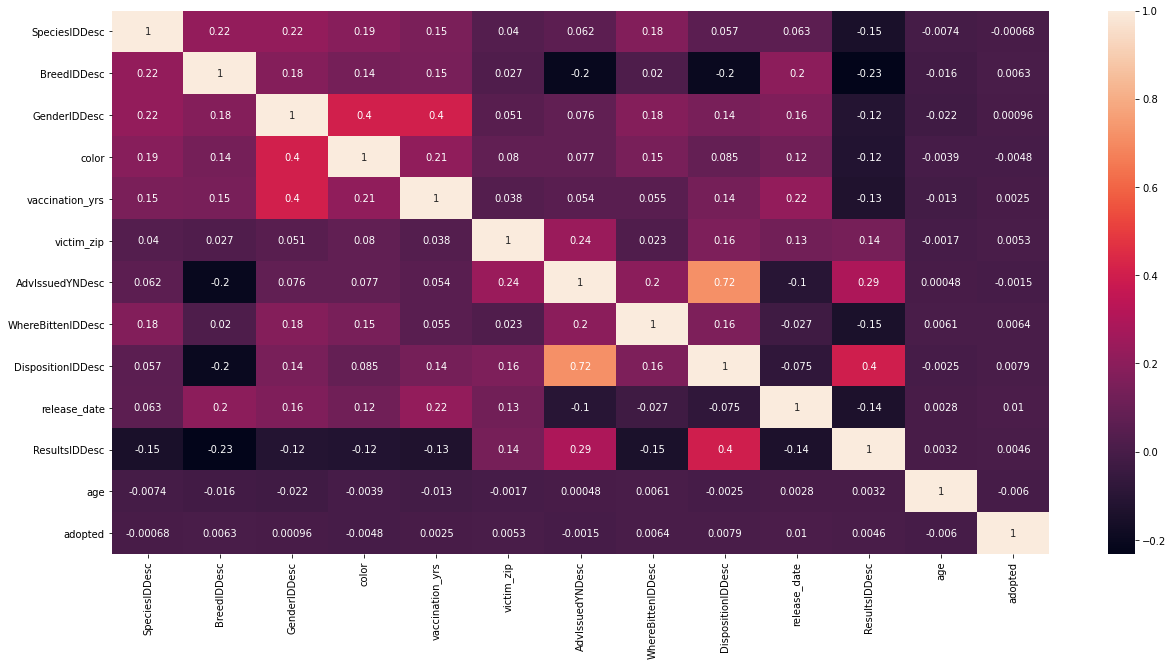

In [36]:
# remplacement des valeur object en numéric + heatMap
data3 = result2
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in data3.columns:
    if(col != "vaccination_date" and col != "head_sent_date" and col != "quarantine_date" and col != "bite_date"):
        data3[col] = label.fit_transform(data3[col])

plt.figure(figsize=(21, 10))
sns.heatmap(data3.corr(), annot=True)
plt.show()

In [44]:
X = data3.drop(["SpeciesIDDesc", 'vaccination_date', "head_sent_date","quarantine_date","bite_date"],axis=1)
Y = data3['SpeciesIDDesc']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X

,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,DispositionIDDesc,release_date,ResultsIDDesc,age,adopted
0,101,0,410,0,107,0,0,3,582,2,2,1
1,101,2,242,4,99,0,0,3,582,2,15,1
2,101,2,712,4,100,0,0,3,582,2,5,1
3,101,1,15,4,233,0,0,3,582,2,14,1
4,101,0,106,4,233,0,0,3,582,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8985,101,3,712,4,111,2,2,4,582,3,8,1
8986,75,1,461,4,85,2,1,4,582,3,6,0
8987,63,1,248,4,185,2,2,4,582,3,21,0
8988,63,0,90,4,107,2,0,4,582,3,4,0


In [45]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
8985    0
8986    0
8987    0
8988    0
8989    0
Name: SpeciesIDDesc, Length: 8990, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [47]:
X_train.shape

(6023, 12)

In [48]:
X_test.shape

(2967, 12)

In [83]:
#Classification par logic regression + matrice de confusion
from sklearn.linear_model import LogisticRegression
# à voir https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406
lr = LogisticRegression(solver='lbfgs', max_iter = 1000000)
lr.fit(X_train,y_train)



/home/neogeo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000000)

In [80]:
#Matrice de confusion
from sklearn.metrics import confusion_matrix
Y_pred = lr.predict(X_test)
print('confusion matrix:\n',confusion_matrix(y_test,Y_pred))

confusion matrix:
 [[2285   19    2    0    0    0    0    0]
 [ 495   26    8    0    0    0    0    0]
 [  25    3   62    0    0    0    0    0]
 [   3    0    2    0    0    0    0    0]
 [   2    0    2    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [  28    1    0    0    0    0    0    0]]


In [84]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cls_forest = RandomForestClassifier(n_estimators=200)
cls_forest.fit(X_train, y_train)

score_rf = cross_val_score(cls_forest,X_train , y_train, cv=10, scoring='accuracy')
print(f'Précision de : {score_rf.mean()}')



/home/neogeo/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
Accuracy 0.8152129716864185
